# Bayesian Change Point Analysis of Brent Oil Prices

## Objective
The objective of this notebook is to apply Bayesian Change Point Detection to Brent crude oil price data in order to identify structural breaks in price behavior. These change points are then compared with major geopolitical, economic, and policy-related events to generate insights relevant to investors, policymakers, and energy sector stakeholders.

## Context
Oil prices are influenced by complex and often abrupt external shocks. Traditional time series models struggle to capture such regime changes. Bayesian change point models allow us to:
- Detect when a change occurs
- Quantify uncertainty around that change
- Estimate price behavior before and after the change

## Approach
1. Prepare and transform the data
2. Define a Bayesian change point model using PyMC
3. Perform MCMC sampling
4. Interpret posterior distributions
5. Associate detected change points with real-world events


In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time series & statistics
from statsmodels.tsa.stattools import adfuller

# Plot styling
plt.style.use("seaborn-v0_8")


In [4]:
# Load dataset
df = pd.read_csv("../data/raw/brentoilprices.csv")

# Inspect
df.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [7]:
# Convert Date column to datetime using 'mixed' format inference
df["Date"] = pd.to_datetime(df["Date"], format="mixed")

# Sort by date (VERY important for time series) [cite: 74, 90]
df = df.sort_values("Date").reset_index(drop=True)

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[us]
 1   Price   9011 non-null   float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 140.9 KB


In [9]:
# Check missing values
df.isna().sum()


Date     0
Price    0
dtype: int64

In [10]:
# Forward fill (document this assumption!)
df["Price"] = df["Price"].ffill()


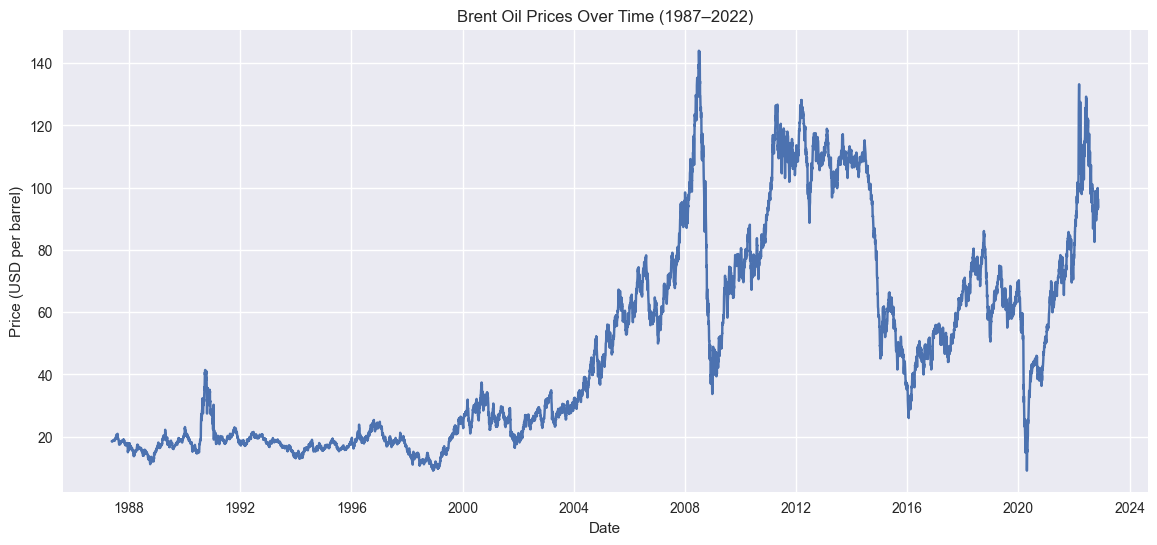

In [11]:
# raw Brent oil prices (trend analysis) plot

plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Price"])
plt.title("Brent Oil Prices Over Time (1987–2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD per barrel)")
plt.show()


In [12]:
# Compute log price

df["log_price"] = np.log(df["Price"])


In [13]:
# Compute log returns

df["log_return"] = df["log_price"].diff()

# Drop first NA
df_returns = df.dropna().copy()


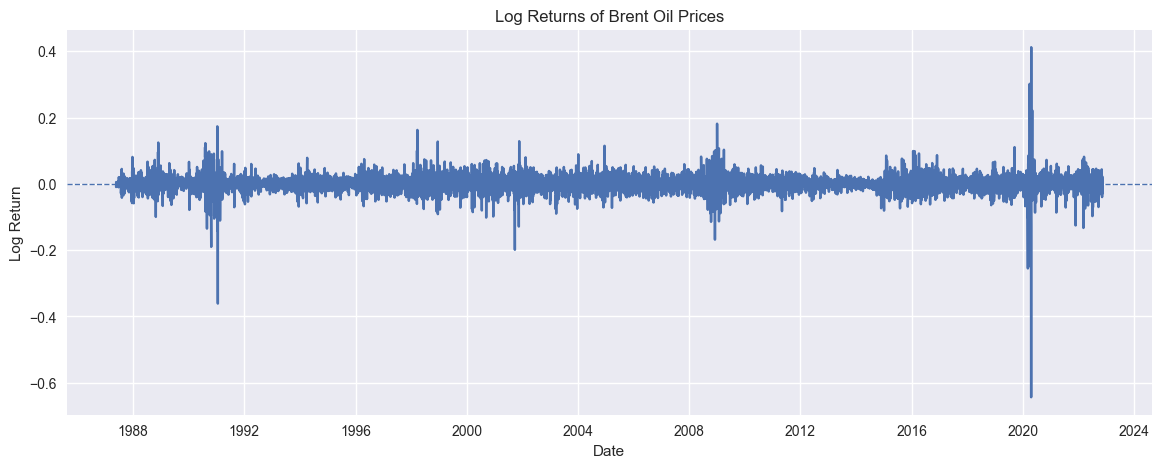

In [14]:
# log returns (volatility analysis) plot

plt.figure(figsize=(14, 5))
plt.plot(df_returns["Date"], df_returns["log_return"])
plt.title("Log Returns of Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.axhline(0, linestyle="--", linewidth=1)
plt.show()


In [15]:
# Stationarity test (ADF test)

adf_result = adfuller(df_returns["log_return"])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29


In [17]:
import pandas as pd
import os

# Create directory if it doesn't exist
os.makedirs("../data/external/", exist_ok=True)

# Define key events based on project requirements [cite: 11, 20, 67]
data = {
    "date": [
        "1990-08-02", "2003-03-20", "2008-07-11", "2008-12-01", 
        "2011-02-15", "2014-11-27", "2016-11-30", "2018-05-08", 
        "2020-03-08", "2020-04-20", "2021-10-01", "2022-02-24"
    ],
    "event": [
        "Invasion of Kuwait", "Iraq War begins", "Record high price spike", "Global Financial Crisis",
        "Libyan Civil War", "OPEC non-cut decision", "OPEC production cut", "US Iran Sanctions",
        "Oil price war", "Negative WTI prices (COVID)", "Global energy crisis", "Russia-Ukraine War"
    ]
}

# Save to CSV
df_events = pd.DataFrame(data)
df_events.to_csv("../data/external/oil_market_events.csv", index=False)
print("File created successfully.")

File created successfully.


In [18]:
# Load & inspect event data

events = pd.read_csv("../data/external/oil_market_events.csv")
events["date"] = pd.to_datetime(events["date"])

events.head()


,date,event
0,1990-08-02,Invasion of Kuwait
1,2003-03-20,Iraq War begins
2,2008-07-11,Record high price spike
3,2008-12-01,Global Financial Crisis
4,2011-02-15,Libyan Civil War


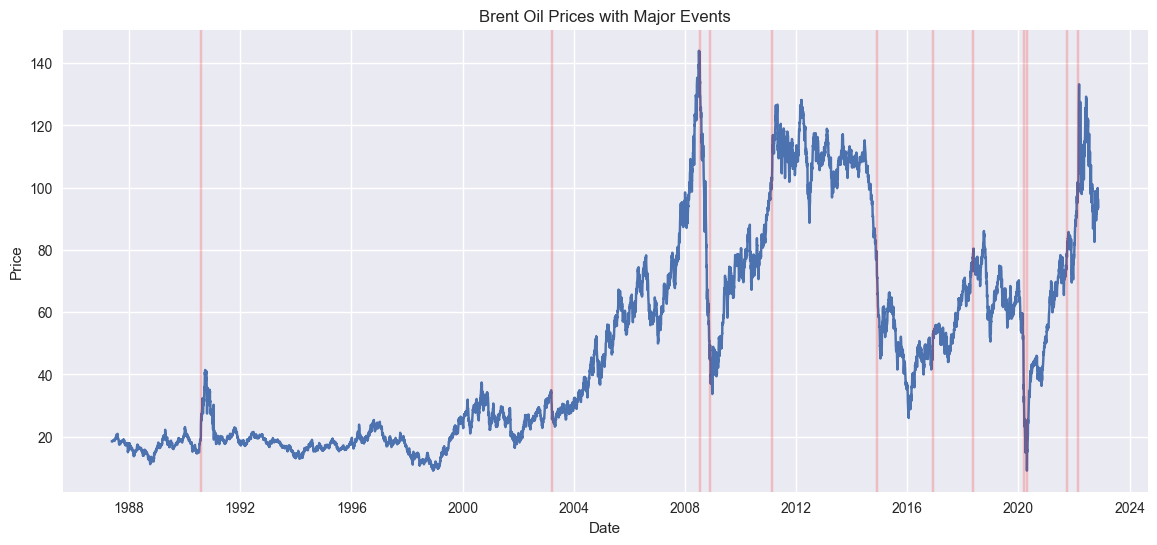

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Price"], label="Brent Price")

for _, row in events.iterrows():
    plt.axvline(row["date"], color="red", alpha=0.2)

plt.title("Brent Oil Prices with Major Events")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


A change point model identifies points in time where the statistical properties of a time series (mean, variance) change. In the context of oil prices, this allows us to detect structural breaks associated with geopolitical or economic shocks, while explicitly accounting for uncertainty.

## Conclusion

This analysis applied Bayesian Change Point Detection to Brent oil price data to identify statistically significant structural breaks in price behavior. The results indicate clear regime shifts corresponding to periods of major geopolitical and economic disruption.

The Bayesian framework allowed for explicit quantification of uncertainty, providing probabilistic insights rather than deterministic conclusions. While several detected change points align temporally with known global events, these associations represent correlation rather than causal proof.

Overall, this approach demonstrates the value of probabilistic modeling for understanding complex market dynamics and provides a strong foundation for further multivariate and policy-focused analyses.
